In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [78]:
df = pd.read_csv('train.csv', parse_dates=True)
df.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [79]:
df.shape

(39161, 19)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [81]:
# Convert the created_at and signup_date to Date datatype
for col in ['created_at', 'signup_date']:
    df[col] = pd.to_datetime(df[col])

In [82]:
# Stats
df.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


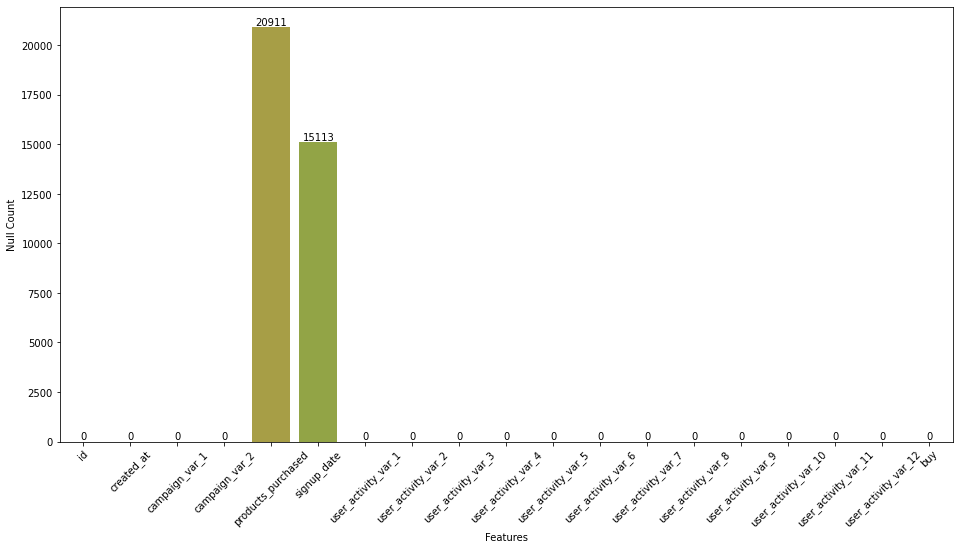

In [83]:
# Null Values
plt.figure(figsize =(16, 8))
sum_null = df.isna().sum().reset_index()
sum_null.columns = ['feature', 'null_count']
ax = sns.barplot(x = 'feature', y = 'null_count', data=sum_null)
ax.bar_label(ax.containers[0])
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.ylabel("Null Count")
plt.show()

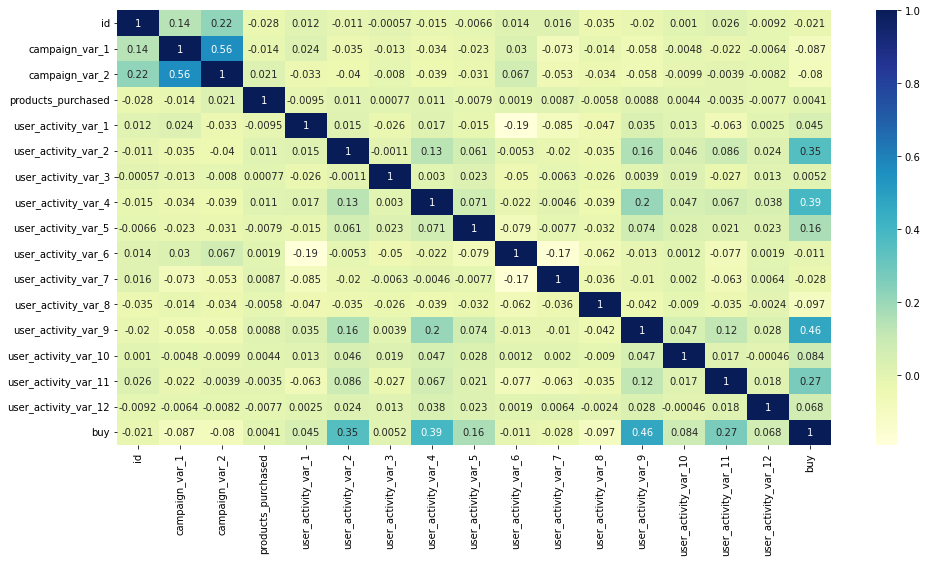

In [84]:
# Correlation Plot
plt.figure(figsize =(16, 8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

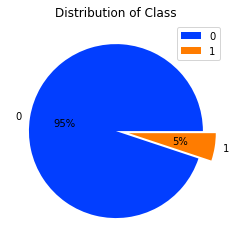

In [117]:
palette_color = sns.color_palette('bright')
explode = [0, 0.15]
data = [37163, 1998]
labels = ['0', '1']
plt.pie(data, labels = labels, colors=palette_color, explode = explode, autopct='%.0f%%')
plt.title('Distribution of Class')
plt.legend()
plt.show()

In [87]:
# variance before imputation
np.var(df['products_purchased'])

0.6080774058922875

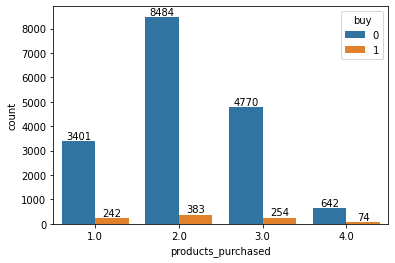

In [88]:
# distribution before imputation
ax = sns.countplot(x="products_purchased", hue="buy", data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

In [89]:
# Extracting Features for DataTime Feature
df['year'] = df['created_at'].dt.year
df['month'] = df['created_at'].dt.month
df['day'] = df['created_at'].dt.day

In [90]:
# Dropping signup date, id, created_at
df = df.drop(['signup_date', 'id', 'created_at'], axis=1)

In [91]:
df.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,year,month,day
0,1,2,2.0,0,0,0,0,0,0,1,1,0,0,0,0,0,2021,1,1
1,2,1,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0,2021,1,1
2,9,3,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,2021,1,1
3,6,7,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,1,1
4,4,6,NaN,0,0,0,0,0,0,1,0,0,0,1,0,0,2021,1,1


In [92]:
X = df.drop('buy', axis=1)
y = df[['buy']]

In [93]:
columns = X.columns

In [94]:
X = X.values

nan

In [95]:
imputer = KNNImputer(n_neighbors=1, weights="uniform")
imputer.fit(X)
X = imputer.transform(X)

In [97]:
X = pd.DataFrame(data=X, columns=columns)

In [98]:
X.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,year,month,day
0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2021.0,1.0,1.0
1,2.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2021.0,1.0,1.0
2,9.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,1.0,1.0
3,6.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,1.0,1.0
4,4.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2021.0,1.0,1.0


In [99]:
# variance after imputation
X['products_purchased'].var()

0.597537266535344

In [101]:

X["year"]= X["year"].astype("int")
X["month"]= X["month"].astype("int")
X["day"]= X["day"].astype("int")

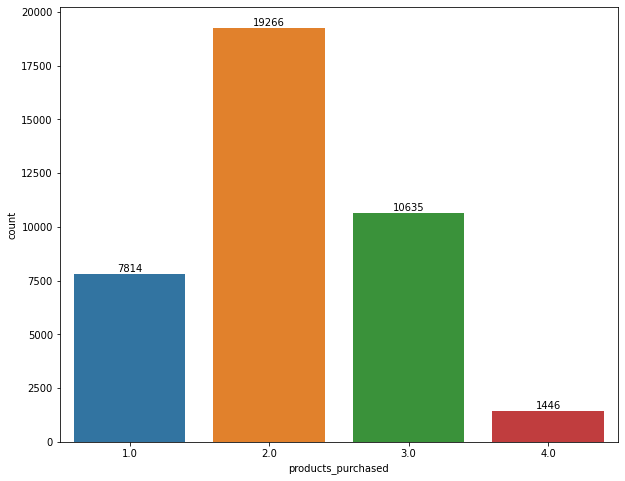

In [102]:
# distribution after imputation
plt.figure(figsize=(10,8))
ax = sns.countplot(x="products_purchased", data=X)
ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])
plt.show()

In [103]:
# Split the data sequentially as it's the time oriented data
# do here
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.20, random_state=0, shuffle=True, stratify=y)

In [ ]:
# Trainin the model

In [136]:
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

In [137]:
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_validate)

# Score
f1_score(y_validate, preds)

C:\Users\amang\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[23:27:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.671875

In [107]:
print(xgb_cl.feature_importances_)

[0.00882943 0.00930594 0.00647856 0.01001084 0.17374976 0.00775397
 0.14140089 0.02379794 0.00904998 0.00739805 0.0448202  0.43107405
 0.02836407 0.07746393 0.00703712 0.         0.00721535 0.00624985]


In [108]:
feature_importance = pd.DataFrame(data = [xgb_cl.feature_importances_], columns=X_train.columns)
feature_importance

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,year,month,day
0,0.008829,0.009306,0.006479,0.010011,0.17375,0.007754,0.141401,0.023798,0.00905,0.007398,0.04482,0.431074,0.028364,0.077464,0.007037,0.0,0.007215,0.00625


Text(0.5, 1.0, 'Feature Importance')

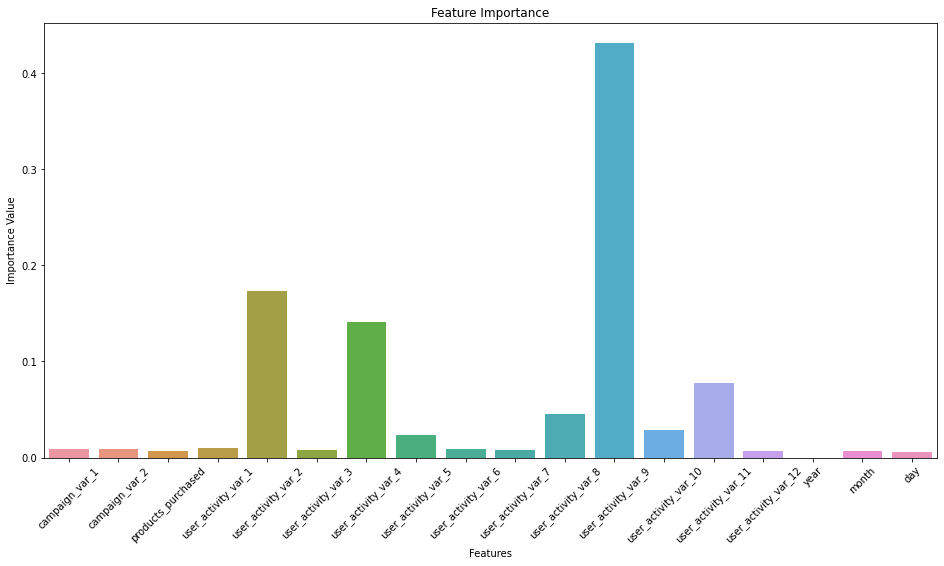

In [115]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x=X_train.columns, y= feature_importance.iloc[0])
# ax.bar_label(ax.containers[0])
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.ylabel("Importance Value")
plt.title('Feature Importance')

In [110]:
# Predictions for the Test data

In [111]:
test = pd.read_csv('test.csv', parse_dates=True)
test.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


In [113]:
test_id = list(test['id'])

In [114]:
# Convert the created_at and signup_date to Date datatype
for col in ['created_at', 'signup_date']:
    test[col] = pd.to_datetime(test[col])

test['year'] = test['created_at'].dt.year
test['month'] = test['created_at'].dt.month
test['day'] = test['created_at'].dt.day

# Dropping signup date, id, created_at
x_test= test.drop(['signup_date', 'id', 'created_at'], axis=1)

x_test = x_test.values

x_test = imputer.transform(x_test)

x_test = pd.DataFrame(data=x_test, columns=columns)

# variance after imputation
print("variance of Test Data", x_test['products_purchased'].var())

x_test["year"]= x_test["year"].astype("int")
x_test["month"]= x_test["month"].astype("int")
x_test["day"]= x_test["day"].astype("int")

test_pred = xgb_cl.predict(x_test)
test_pred

submission = pd.DataFrame({'id': test_id, 'buy': test_pred})

submission.to_csv('submission.csv', index=False)

variance of Test Data 0.6035448747890966
